In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


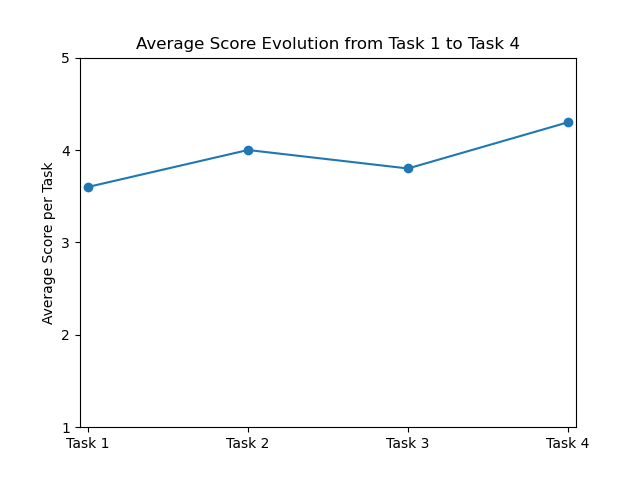

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# this sets up the Matplotlib interactive windows:
%matplotlib widget

# this changes the default date converter for better interactive plotting of dates:
plt.rcParams['date.converter'] = 'concise'
df = pd.read_csv('data.csv')

#df.drop(df.columns[allCols], axis = 1,inplace=True)
#labels = list(dados['Gender'].unique())
#sizes = dados['Gender'].value_counts()
#fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels)

cols = [0,1,2,3,4,5,6,7,8,9,10,11,12]
task1 = [13,14,15,16,17]
task2 = [18,19,20,21,22,23]
task3 = [24,25,26,27,28,29,30]
task4 = [31,32,33,34,35,36]
task5 = [37,38,39,40]
sus = [41,42,43,44,45,46,47,48,49,50]
nasa = [51,52,53,54,55,56]
final = [57,58,59,60,61,62,63]
traceLogs = [15,21,26,33]
simModes = [20,32]
allCols = cols + task1 + task2 + task3 + task4 + task5 + sus + nasa + final

#how easy was it to understand the trace log: compare evolution from task 1 to task 5
#df.iloc[:, traceLogs].mean()
#df.iloc[:, traceLogs]

x = ['Task 1','Task 2','Task 3','Task 4']
y = df.iloc[:, traceLogs].mean()
fig, ax = plt.subplots()
#ax.plot(x, y, linewidth=2.0)
plt.plot(x, y, "-o")
ax.set(xlim=(-0.05, 3.05), xticks=np.arange(0, 4),
       ylim=(1, 5), yticks=np.arange(1, 6))
ax.set_ylabel('Average Score per Task')
ax.set_title('Average Score Evolution from Task 1 to Task 4')
plt.show()

How useful do you think the Scaled Real-time Simulation mode you used can be?       4.7
How useful do you think the As-fast-as-Possible Simulation mode you used can be?    4.7
dtype: float64

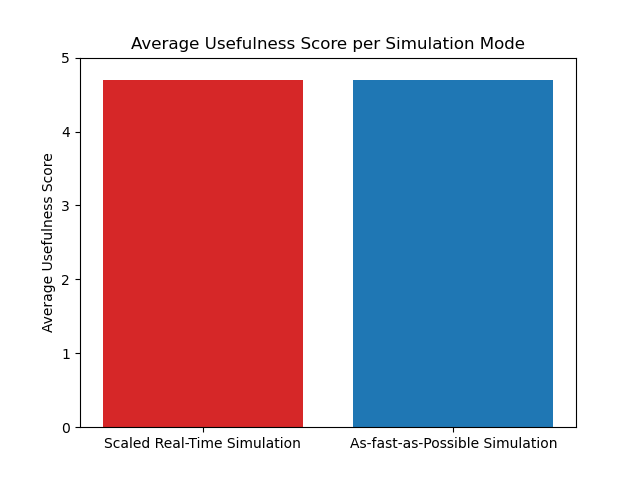

In [37]:
#compare usefulness between simulation modes
fig, ax = plt.subplots()
x = ['Scaled Real-Time Simulation','As-fast-as-Possible Simulation']
#fruits = ['apple', 'blueberry', 'cherry', 'orange']
#counts = [40, 100, 30, 55]
y = df.iloc[:, simModes].mean()
#bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(x, y, color=bar_colors)
ax.set(yticks=np.arange(0, 6))
ax.set_ylabel('Average Usefulness Score')
ax.set_title('Average Usefulness Score per Simulation Mode')
#ax.legend(title='Fruit color')
df.iloc[:, simModes].mean()
#plt.show()

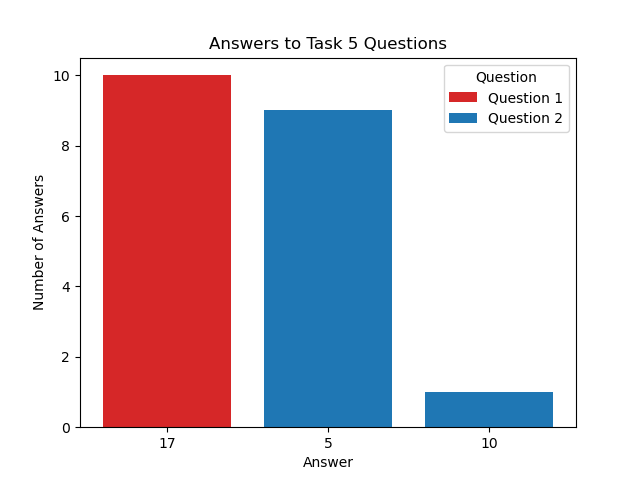

In [4]:
#grafico de barras com as perguntas da task 5 (so um grafico)
task5_answer1 = [37]
task5_answer2 = [38]

#fig, ax = plt.subplots()
#x = pd.unique(df.iloc[:, task5_answers].values.ravel())
x = ['17','5','10']
y = [10, 9, 1]
fig1, ax1 = plt.subplots()
bar_colors = ['tab:red', 'tab:blue', 'tab:blue']
bar_labels = ['Question 1', 'Question 2', '_blue']
ax1.bar(x, y, color=bar_colors, label=bar_labels)
ax1.set_ylabel('Number of Answers')
ax1.set_xlabel('Answer')
ax1.set_title('Answers to Task 5 Questions')
ax1.legend(title='Question')
#df.iloc[:, simModes].mean()
#plt.show()

/tmp/ipykernel_253/565683309.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = score + (row[i] - 1)
/tmp/ipykernel_253/565683309.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = score + (5 - row[i])


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 2., 0., 0., 0., 0., 1.]),
 array([45.  , 46.25, 47.5 , 48.75, 50.  , 51.25, 52.5 , 53.75, 55.  ,
        56.25, 57.5 , 58.75, 60.  , 61.25, 62.5 , 63.75, 65.  , 66.25,
        67.5 , 68.75, 70.  , 71.25, 72.5 , 73.75, 75.  , 76.25, 77.5 ,
        78.75, 80.  , 81.25, 82.5 , 83.75, 85.  , 86.25, 87.5 , 88.75,
        90.  , 91.25, 92.5 , 93.75, 95.  , 96.25, 97.5 ]),
 <BarContainer object of 42 artists>)

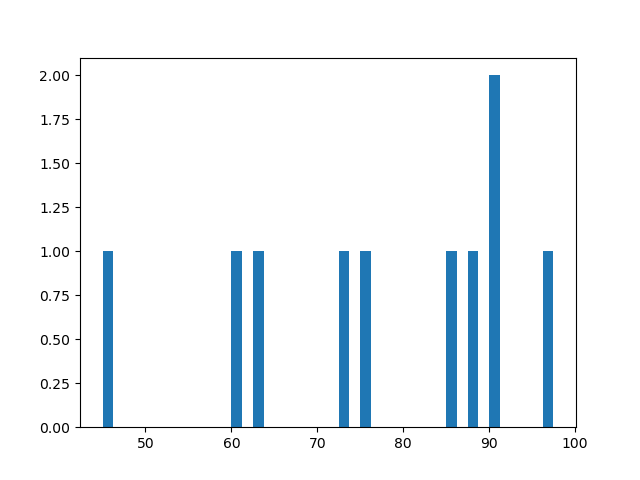

In [31]:
#calcular os sus scores

#df.iloc[:, sus]
# scale pos - 1
cond1 = [0,2,4,6,8]
# 5 - scale pos
cond2 = [1,3,5,7,9]

#print(df.iloc[:, sus])
def calc_sus(row):
    score = 0
    for i in range(0, len(row), 2) :
        score = score + (row[i] - 1)
    for i in range(1, len(row), 2) :
        score = score + (5 - row[i])
    return score * 2.5

df['sus_score'] = df.iloc[:, sus].apply(calc_sus, axis=1)

x = list(df['sus_score'])
y = list(range(0,10))
fig2, ax2 = plt.subplots()
ax2.hist(x, 42)

In [35]:
#calcular os nasa-tlx scores
from statistics import mean

#df['nasa_score'] = df.iloc[:, nasa].mean(axis=1)

def calc_nasa_score(row):
    m = mean(row)
    return m * 10

df['nasa_score'] = df.iloc[:, nasa].apply(calc_nasa_score, axis=1)
print(df['nasa_score'])

0    38.333333
1    23.333333
2    28.333333
3    31.666667
4    30.000000
5    15.000000
6    18.333333
7    21.666667
8    25.000000
9    16.666667
Name: nasa_score, dtype: float64


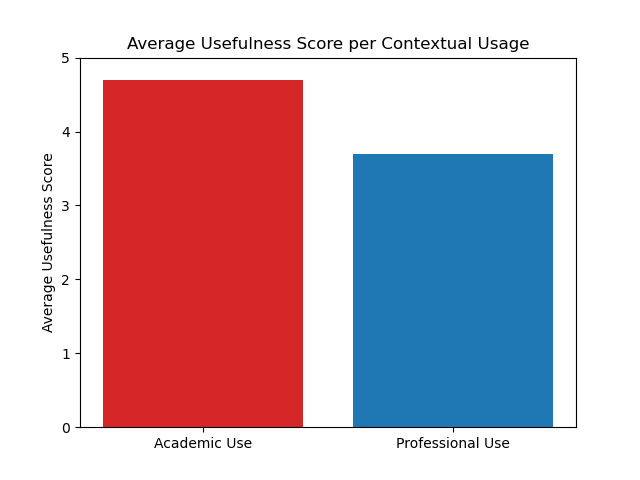

In [41]:
#fazer alguma coisa com as perguntas finais
#avg usefullness para academic vs para prof
final = [57,58,59,60,61,62,63]
final_usage = [58, 59]

fig, ax = plt.subplots()
x = ['Academic Use','Professional Use']
#fruits = ['apple', 'blueberry', 'cherry', 'orange']
#counts = [40, 100, 30, 55]
y = df.iloc[:, final_usage].mean()
#bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(x, y, color=bar_colors)
ax.set(yticks=np.arange(0, 6))
ax.set_ylabel('Average Usefulness Score')
ax.set_title('Average Usefulness Score per Contextual Usage')
#ax.legend(title='Fruit color')
plt.show()

In [ ]:
#juntar varios niveis de how easy para varias features
#help, arguments, change in sim speed, place breakpoint, step, 